In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style = "whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [8]:
# Set data folder path

# Check the absolute path of the dataset folder
data_path = r"D:/Projects/Instacart-Analysis/data"  

# Load CSV files
aisles = pd.read_csv(data_path + "/aisles.csv")
departments = pd.read_csv(data_path + "/departments.csv")
order_products__prior = pd.read_csv(data_path + "/order_products__prior.csv")
order_products__train = pd.read_csv(data_path + "/order_products__train.csv")
orders = pd.read_csv(data_path + "/orders.csv")
products = pd.read_csv(data_path + "/products.csv")


In [9]:
# Check the First Few Rows

aisles.head()
departments.head()
products.head()
orders.head()
order_products__prior.head()
order_products__train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
# Check Data Types & Missing Values

# List of dataset names and their corresponding variables
dataset_names = ["aisles", "departments", "products", "orders", "order_products__prior", "order_products__train"]
datasets = [aisles, departments, products, orders, order_products__prior, order_products__train]

# Loop through each dataset and print basic info
for i in range(len(dataset_names)):
    print(f"📌 Dataset: {dataset_names[i]}")  # Print the name of the dataset
    print(datasets[i].info(), "\n")  # Print the basic info of the dataset



📌 Dataset: aisles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None 

📌 Dataset: departments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None 

📌 Dataset: products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle

In [30]:
# Check Missing Values in Each Dataset

# Print the header
print("Missing Values in Each Dataset:")

# Loop through the datasets and print missing values
for i in range(len(dataset_names)):
    print(f"{dataset_names[i]}:")  # Print the name of the dataset
    print(datasets[i].isnull().sum(), "\n")  # Print the missing values count for the dataset


Missing Values in Each Dataset:
aisles:
aisle_id    0
aisle       0
dtype: int64 

departments:
department_id    0
department       0
dtype: int64 

products:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64 

orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64 

order_products__prior:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

order_products__train:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 



In [12]:
# Check for Duplicates

# Print duplicate counts for each dataset
print("🔍 Checking Duplicates:")
for i in range(len(dataset_names)):
    print(f"{dataset_names[i]}: {datasets[i].duplicated().sum()} duplicates found.")



🔍 Checking Duplicates:
aisles: 0 duplicates found.
departments: 0 duplicates found.
products: 0 duplicates found.
orders: 0 duplicates found.
order_products__prior: 0 duplicates found.
order_products__train: 0 duplicates found.


In [34]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


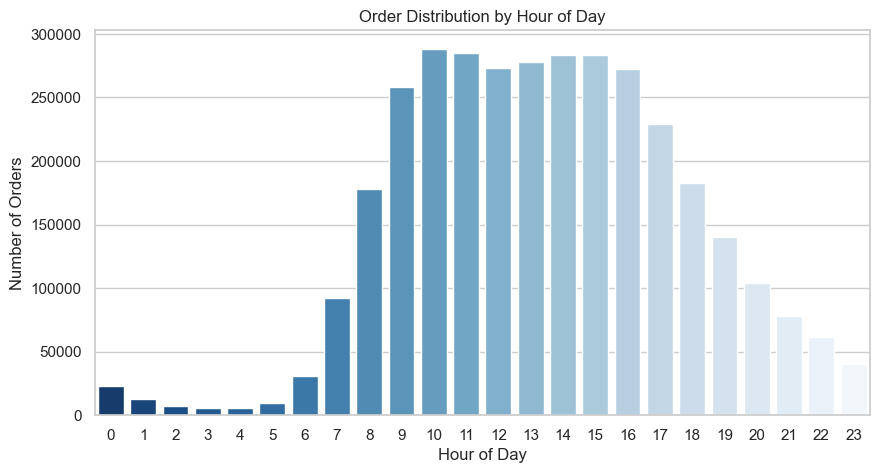

In [35]:
# Exploratory Data Analysis (EDA)

# Order Distribution by Hour of Day

plt.figure(figsize=(10,5))
sns.countplot(x="order_hour_of_day", data=orders, palette="Blues_r")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Order Distribution by Hour of Day")
plt.show()

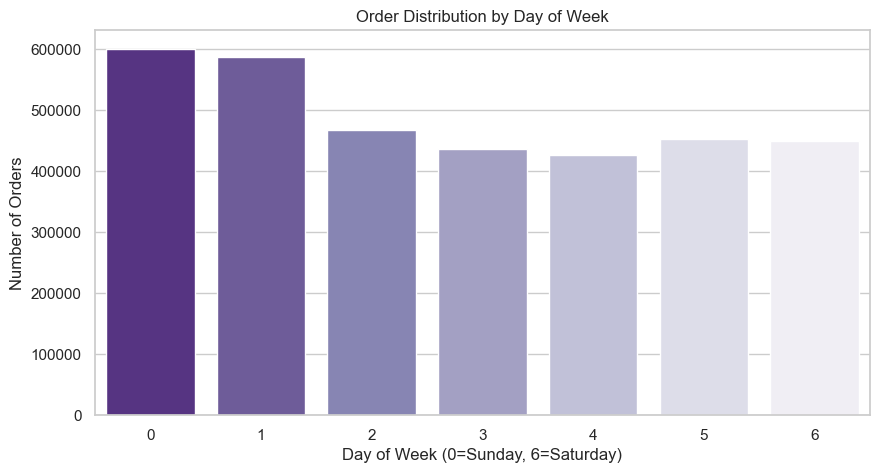

In [36]:
# Order Distribution by Day of Week

plt.figure(figsize=(10,5))
sns.countplot(x="order_dow", data=orders, palette="Purples_r")
plt.xlabel("Day of Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Orders")
plt.title("Order Distribution by Day of Week")
plt.show()




In [44]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [45]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


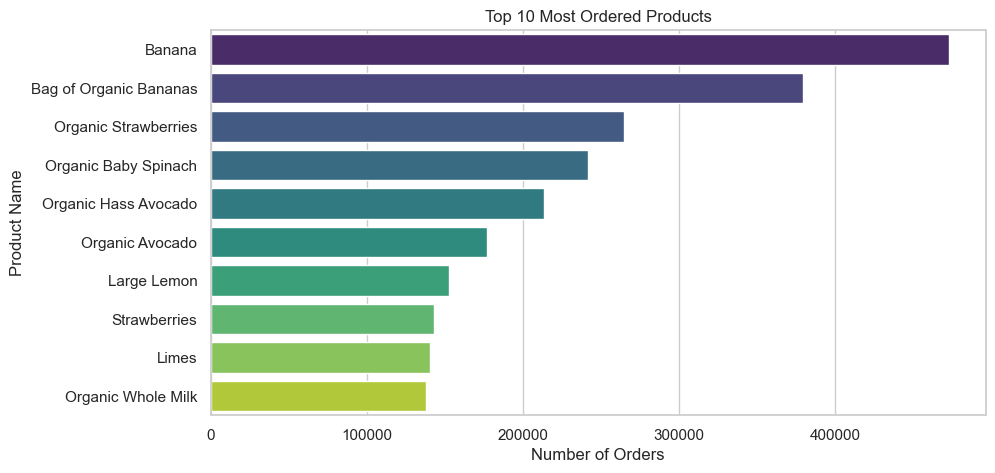

In [46]:
# Most Frequently Ordered Products

# Merge products with order_products_prior
merged = order_products__prior.merge(products, on="product_id", how="left")

# Top 10 most ordered products
top_products = merged["product_name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.title("Top 10 Most Ordered Products")
plt.show()



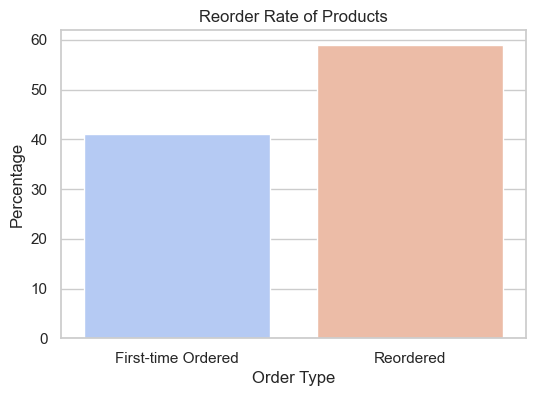

In [13]:
# Customer Reordering Behavior

# Reorder rate calculation
reorder_rate = order_products__prior['reordered'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=reorder_rate.index, y=reorder_rate.values, palette="coolwarm")
plt.xticks([0, 1], ["First-time Ordered", "Reordered"])
plt.xlabel("Order Type")
plt.ylabel("Percentage")
plt.title("Reorder Rate of Products")
plt.show()


In [14]:
# Insight:

# 60 % of products are reorders
# Customers are loyal to the same products

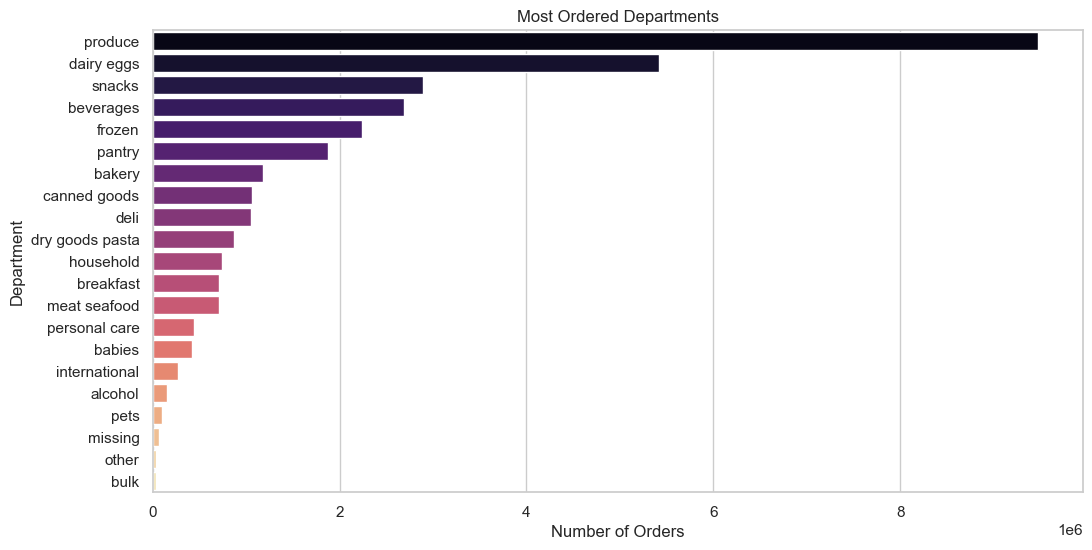

In [15]:
# Most Ordered Departments

# Merge department names
product_dept = products.merge(departments, on='department_id')

# Count orders per department
dept_orders = order_products__prior.merge(product_dept, on='product_id')
dept_orders = dept_orders['department'].value_counts().reset_index()
dept_orders.columns = ['department', 'order_count']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(y="department", x="order_count", data=dept_orders, palette="magma")
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.title("Most Ordered Departments")
plt.show()


In [18]:
# Insight:

# Produce, Dairy eggs and Snacks department have the highest demand

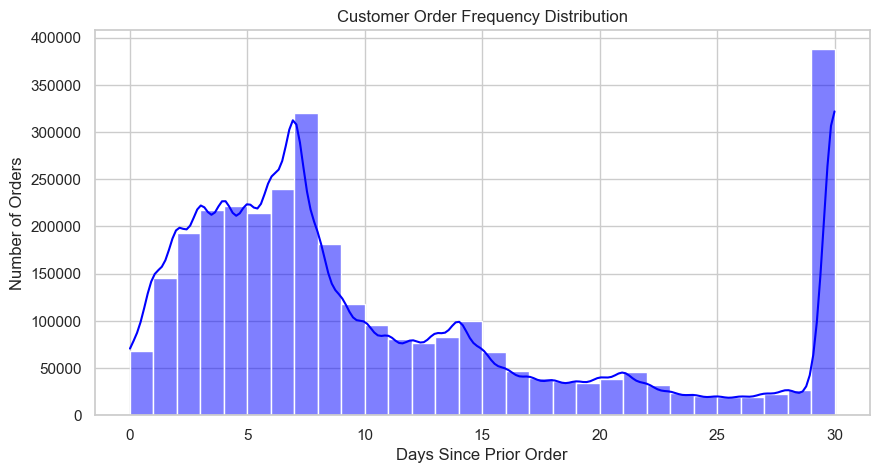

In [19]:
# Customer Order Frequency

plt.figure(figsize=(10,5))
sns.histplot(orders["days_since_prior_order"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.title("Customer Order Frequency Distribution")
plt.show()



In [20]:
# Insight:

# Spikes on the 8th and 30th days suggest a pattern in customer ordering behavior.

# Possible reasons:
# Weekly Shopping Habits: Many customers may prefer ordering every week (around 7-8 days).
# Monthly Restocking: A large group of customers may place bulk grocery orders once a month (~30 days).
# Promotions or Pay Cycle Influence: Discounts, salary credit cycles, or subscription-based deliveries could be influencing these peaks.

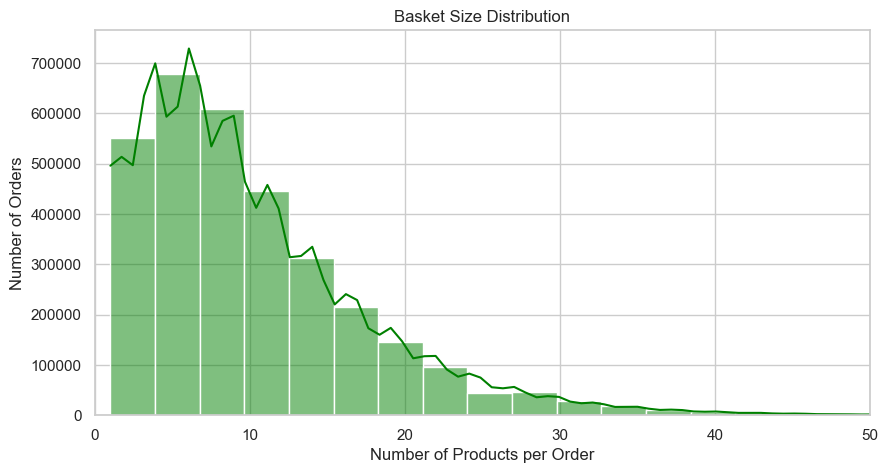

In [21]:
# Basket Size Distribution

order_sizes = order_products__prior.groupby("order_id")["product_id"].count()

plt.figure(figsize=(10,5))
sns.histplot(order_sizes, bins=50, kde=True, color="green")
plt.xlabel("Number of Products per Order")
plt.ylabel("Number of Orders")
plt.title("Basket Size Distribution")
plt.xlim(0, 50)
plt.show()


In [22]:
# Insight:

# Frequent Small Orders:

# A high number of orders with 1 to 10 products indicates that most customers are making smaller purchases. 
# This could mean that customers prefer convenience and are purchasing just a few items at a time.
# This is often seen in grocery shopping, where customers might be buying only a few items they need urgently, rather than bulk buying.

# Implications for Marketing:

# Since many customers are buying small baskets, your marketing campaigns could be more effective if focused on encouraging customers 
# to add more items to their cart (upselling).
# Personalized recommendations for customers based on the products they add to the cart could encourage adding complementary items.
# Consider implementing discounts for orders with a certain number of products to encourage customers to buy more, 
# like "Add 5 more items and get 10% off".
